In [2]:
 !pip install mtcnn

You should consider upgrading via the 'c:\users\anils\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!pip install scikit-image

You should consider upgrading via the 'c:\users\anils\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [12]:
import matplotlib.pyplot as plt
import mtcnn
import numpy as np
import cv2
from skimage.feature import hog
from skimage import exposure
import pandas as pd
from skimage.transform import resize
import os
# import ast
# import torch
# from torchvision import transforms
# from torch.utils.data import DataLoader


def angle_correction(face,data,desired_face_width=256,desired_face_height=256):
    angle,scale,eye_center=rotation_matrix_para(data,desired_face_width)

    rotated_matrix=cv2.getRotationMatrix2D(center=eye_center,angle=angle,scale=scale)

    rotated_matrix[0,2]+=(desired_face_width*0.5-eye_center[0])
    rotated_matrix[1,2]+=(desired_face_height*0.35-eye_center[1])

    rotated_img=cv2.warpAffine(src=face,M=rotated_matrix,dsize=(desired_face_width,desired_face_height))

    return rotated_img

def rotation_matrix_para(data,desired_face_width):
    left_eye = new_cordinates(data, 'left_eye')
    right_eye = new_cordinates(data, 'right_eye')
    dx = left_eye[0] - right_eye[0]
    dy = left_eye[1] - right_eye[1]
    angle = np.degrees(np.arctan2(dy, dx)) - 180

    dist = np.sqrt(dx ** 2 + dy ** 2)
    desired_dist = 0.30 * desired_face_width
    scale = desired_dist / dist
    eye_center = ((left_eye[0] + right_eye[0]) // 2, (left_eye[1] + right_eye[1]) // 2)

    return angle,scale,eye_center


def new_cordinates(data,face_part):
    return (data['keypoints'][face_part][0]-data['box'][0],data['keypoints'][face_part][1]-data['box'][1])

def face_box(data,result_list):
    faces=[]
    #ax=plt.gca()
    for result in result_list:
        x,y,width,height=result['box']
        # rect=plt.Rectangle((x,y),width,height,fill=False,color='green')
        # ax.add_patch(rect)

        # for i,j in result['keypoints'].items():
        #     dot=plt.Circle(j,color='red',radius=2)
        #     ax.add_patch(dot)

        corrected_face=angle_correction(data[y:y+height,x:x+width],result)
        faces.append(corrected_face)
        # plt.imshow(corrected_face)
        # plt.show()
    return faces
    #plt.show()

def graph_plot(img):
    plt.hist(img.flat,bins=100,range=(0,255))
    plt.show()

def hog_descriptor(imgs):
    faces=[]
    for img in imgs:
        #resized_img = resize(img, (128, 64))
        fd, hog_img = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True,multichannel=True)
        hog_image_rescaled = exposure.rescale_intensity(hog_img, in_range=(0, 10))
        faces.append(hog_image_rescaled)
    return faces

class create_Dataset:
    def __init__(self):
        self.df=pd.DataFrame(columns=['left_eye','right_eye','nose','mouth_left','mouth_right','label'])


    def create_csv(self,final_faces,label):
        for i in final_faces:
            self.df.loc[len(self.df.index)]=[i[0]['keypoints']['left_eye'],i[0]['keypoints']['right_eye'],i[0]['keypoints']['nose'],i[0]['keypoints']['mouth_left'],i[0]['keypoints']['mouth_right'],label]
            print(type(i[0]['keypoints']['left_eye']),i[0]['keypoints']['left_eye'])
    def get_dataframe(self):
        return self.df



def main():
#     path='/content/drive/MyDrive/temp_data'
    path=r'C:\Users\anils\OneDrive\Desktop\ml\temp_data'
    # data=getVideos()
    detector = mtcnn.MTCNN()
    # cs = create_Dataset()
    frames=[]
    im_size = 112
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
#     transform=transforms.Compose([
#         transforms.ToPILImage(),
#         transforms.Resize((im_size,im_size)),
#         transforms.ToTensor(),
#         transforms.Normalize(mean,std)
#     ])
    labels=[]
    # for img in data:
    #   # if img[1]=='real':
    #   #   label=1
    #   # elif img[0]=='fake':
    #   #   label=0
    #   faces=detector.detect_faces(img)
    #   all_faces=face_box(img,faces)
    #   for i in range(len(all_faces)):
    #     frames.append(transform(all_faces[i]))
    # return frames

    for filename in os.listdir(path):
        img = plt.imread(os.path.join(path, filename))
        if img is not None:
            if 'real' in filename:
                label=1
            else:
                label=0
            #imgs=cs.get_files('D:\\Study\\6th Sem\\AML\project\\data\\temp_data\\')
            #for pixels in imgs:
            #graph_plot(pixels)
            faces=detector.detect_faces(img)
            all_faces=face_box(img,faces)
            #hog_all_faces=hog_descriptor(all_faces)
            final_faces=[]
            for i in range(len(all_faces)):
                # temp=detector.detect_faces(all_faces[i])
                # if temp:
                #     final_faces.append(temp)
                frames.append((all_faces[i],label))
    #             # if i==0:
    #               # print(frames[0])
    #             labels.append(label)
            #cs.create_csv(final_faces,label)
    # df=cs.get_dataframe()
    # df.to_csv('D:/Study/6th Sem/AML/project/data/temp_data/data.csv',index=False)
    return frames
#     import random
#     random.shuffle(frames)
#     train_data,val_data=(frames[:int(len(frames)*0.7)]),(frames[int(len(frames)*0.7):])
#     # print(f'traindata : {train_data}')
#     train_loader=DataLoader(frames,batch_size=20,shuffle=True,num_workers=5)
#     val_loader=DataLoader(frames,batch_size=20,shuffle=True,num_workers=5)
#     return train_loader,val_loader


frames=main()


1/1 [==============================] - 0s 32ms/step


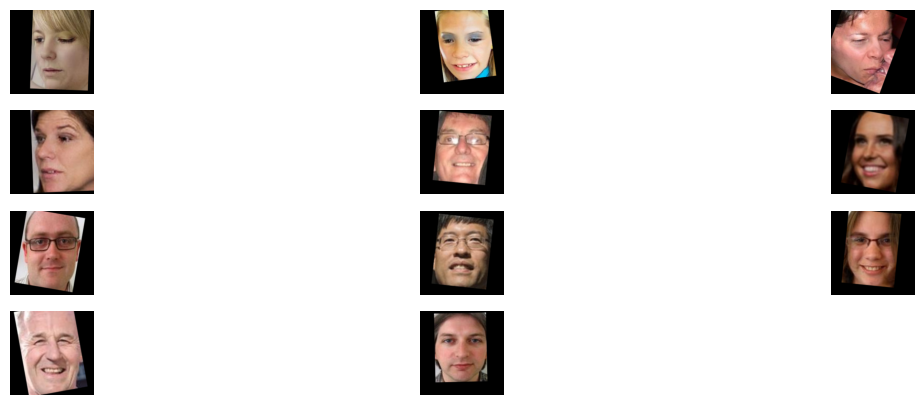

In [18]:
num_frames = len(frames)
num_cols = 3
num_rows = (num_frames + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

axes = axes.flatten()

for i, frame in enumerate(frames):
    axes[i].imshow(frame[0])
    axes[i].axis('off')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()